In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns
from math import sqrt
from sys import exit
import os 

def get_coord(desc, shape, bin_per_dim = 5):
    coordinate = 0
    pointsize = 1/bin_per_dim
    for i in range(len(desc)):
        if i == 0:
            coordinate += desc[len(desc)-1] / pointsize
        else:
            coordinate += (bin_per_dim**i) * (desc[len(desc)-1-i] / pointsize)
    
    return np.unravel_index(int(coordinate), shape, order='F')
    
def present_heatmap(num_dims, bin_per_dim, filename, coordsfilename = "",
                    gp_archive = False, fix_range = False, minimum = -0.5,
                    maximum = 8, num_samples = 0, points = []):
    read_coords = coordsfilename != ""

    bin_size = 1 / bin_per_dim
    pointsize = 1 / bin_per_dim
    data = np.empty(bin_per_dim ** num_dims)
    
    dimxy = int(sqrt(bin_per_dim ** num_dims))
    
    data[:] = np.nan

    # if original archive
    if not gp_archive:
        r,a,b,c,d,e,f,z,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_ = np.loadtxt(filename, unpack=True)
    # if archive from gaussian process from ite
    else:
        a,b,c,d,e,f,z,_,_ = np.loadtxt(filename, unpack=True)
    
    minscore, maxscore = 0, 0

    for i in range(len(a)):
        if gp_archive and i == 0: # avoid title in gp archives.
            continue
            
        coord = get_coord([a[i], b[i], c[i], d[i], e[i], f[i]], (dimxy, dimxy)) # 2d, must convert
        row = np.ravel_multi_index(coord, (dimxy, dimxy), order='F') # convert from 2d to 1d location
        
        data[row] = z[i]
        if z[i] > maxscore:
            maxscore = z[i]
        if z[i] < minscore:
            minscore = z[i]

    
    print("Minscore found: " + str(minscore))
    print("Maxscore found: " + str(maxscore))
    
    heat = np.reshape(data, (dimxy, dimxy))

    fig, ax = plt.subplots()

    sns.set(rc={'figure.figsize':(15,10)})


    thick_lines_pos = list(range(0,int(dimxy + dimxy/5),int(dimxy/5)))
    lines_pos = list(range(int(dimxy/(5*5)),int(dimxy),int(dimxy/(5*5))))
    thin_lines_pos = list(range(int(dimxy/(5*5*5)),int(dimxy),int(dimxy/(5*5*5))))

    ax.hlines(thick_lines_pos, 0, dimxy, lw=4)
    ax.vlines(thick_lines_pos, 0, dimxy, lw=4)

    ax.hlines(lines_pos, 0, dimxy, lw=1.5)
    ax.vlines(lines_pos, 0, dimxy, lw=1.5)

    # ax.hlines(thin_lines_pos, 0, dimxy, lw=0.2)
    # ax.vlines(thin_lines_pos, 0, dimxy, lw=0.2)

    ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
    ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
    ax.grid(b=True, which='major', color='w', linewidth=1.0)
    ax.grid(b=True, which='minor', color='w', linewidth=0.5)
    ax.set_facecolor('white')

    with sns.axes_style("white"): # makes nan values white
        if fix_range:
            minscore = minimum
            maxscore = maximum
            
        hmap = sns.heatmap(heat, mask=np.isnan(heat), vmin=minscore, vmax=maxscore, cmap="jet", xticklabels=False,
               yticklabels=False, linecolor='white', cbar_kws={'label': 'covered meters'})

    hmap.set_title("Map: Body-orientation", fontsize=20)

    if read_coords:
        samples = np.loadtxt(coordsfilename)[:,1:]
        prev_coord = (0,0)

        for i in range(num_samples):
            curr_coord = get_coord(samples[i], heat.shape)

            if i == 0:
                prev_coord = curr_coord
                # plt.scatter(prev_coord[0], prev_coord[1], s=80, facecolors='none', edgecolors='r')
                plt.plot(prev_coord[0],prev_coord[1], "o", markersize=40,
                markeredgewidth=10,markeredgecolor='g',
                markerfacecolor='None')

            else:
                
                if prev_coord[0] != curr_coord[0] and prev_coord[1] != curr_coord[1]:
                    ax.arrow(prev_coord[0], prev_coord[1], 
                             curr_coord[0] - prev_coord[0], curr_coord[1] - prev_coord[1], 
                             color='black', linewidth = 8, head_width = 1, head_length = 1, 
                             length_includes_head = True)
                
                prev_coord = curr_coord

                if i == num_samples - 1:
                    plt.plot(curr_coord[0],curr_coord[1], "o", markersize=40,
                    markeredgewidth=10,markeredgecolor='r',
                    markerfacecolor='None')
    
    if len(points) > 0: # plot specific points from arguments
        for point in points:
            coord = get_coord(point, heat.shape)
            
            plt.plot(coord[0],coord[1], "*", markersize=40,
                    markeredgewidth=1,markeredgecolor='k',
                    markerfacecolor='w')
            
    # ax.annotate("", xy=(0.5, 0.5), xytext=(0, 0), arrowprops=dict(arrowstyle="->"))
    plt.savefig(filename + ".png")
    plt.show()

Minscore found: 0
Maxscore found: 8.52512


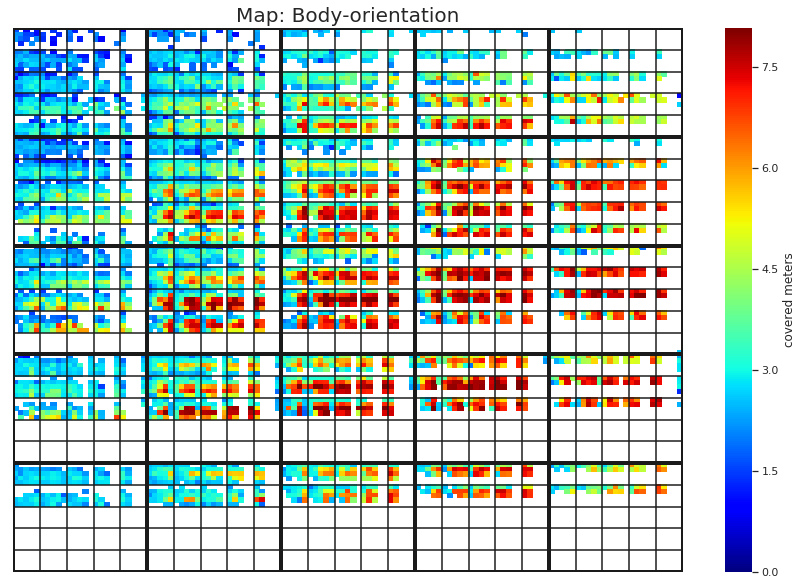

In [13]:
# present generated heat map
num_dims = 6 # dimensions of descriptor
bin_per_dim = 5 # bins in each descriptor
filename = "bo0208/1/archive_3000.dat" # text archive you want to present
#filename = "dcf0608/2/archive_3600.dat" # text archive you want to present

coordsfilename = ""

present_heatmap(num_dims, bin_per_dim, filename, coordsfilename, 
                fix_range = True, minimum = 0, maximum = 8.07143,
               num_samples = 2)

Minscore found: 0
Maxscore found: 8.45365


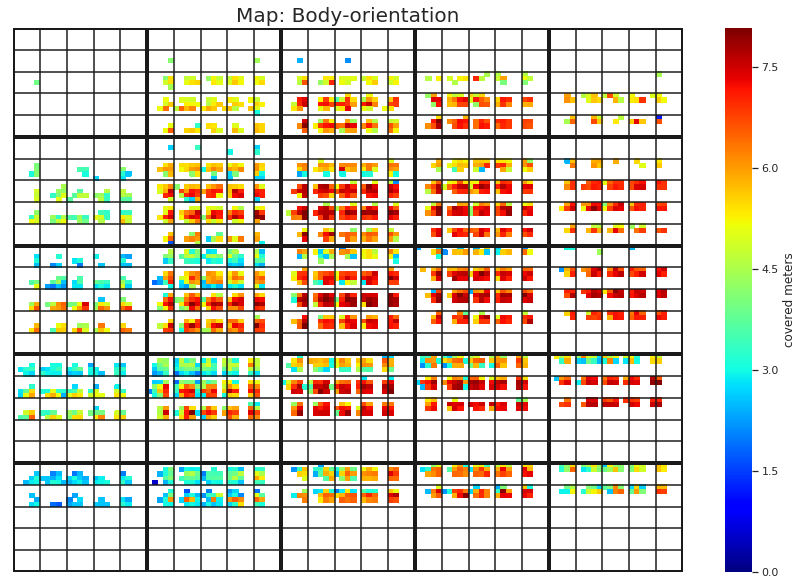

Minscore found: 0
Maxscore found: 8.39996


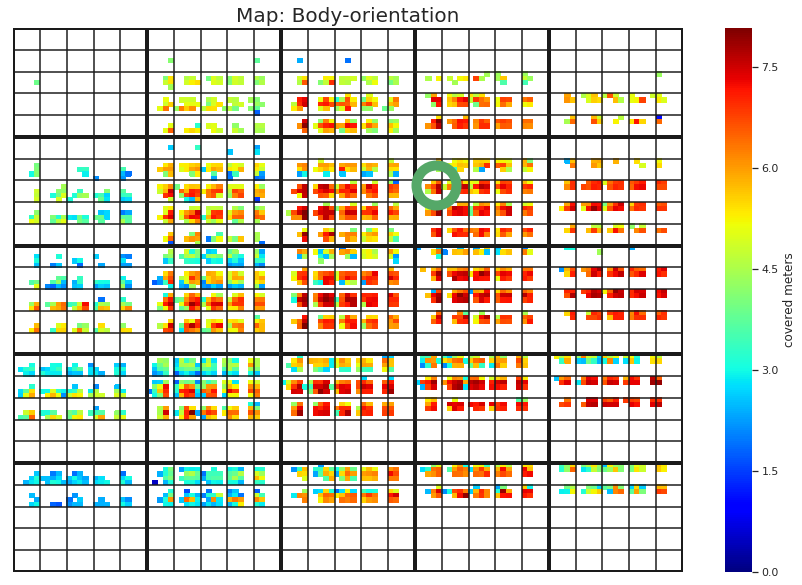

Minscore found: 0
Maxscore found: 7.86821


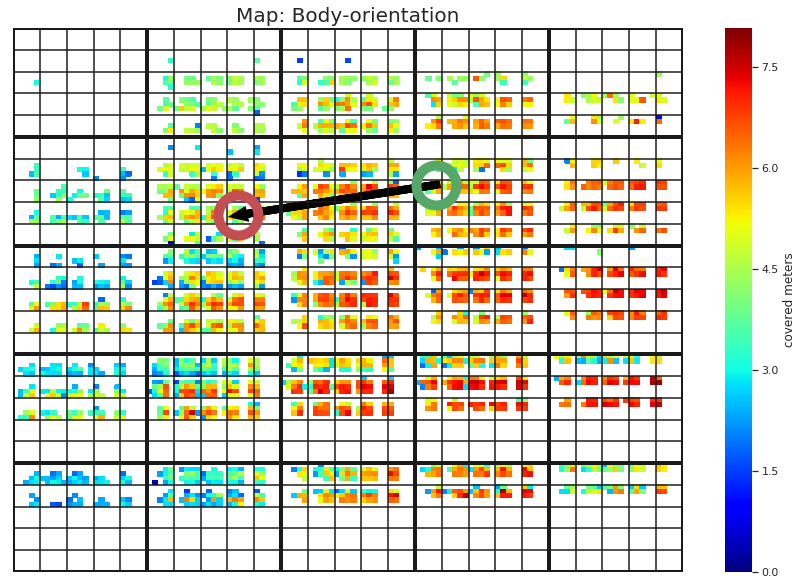

Minscore found: 0
Maxscore found: 7.56562


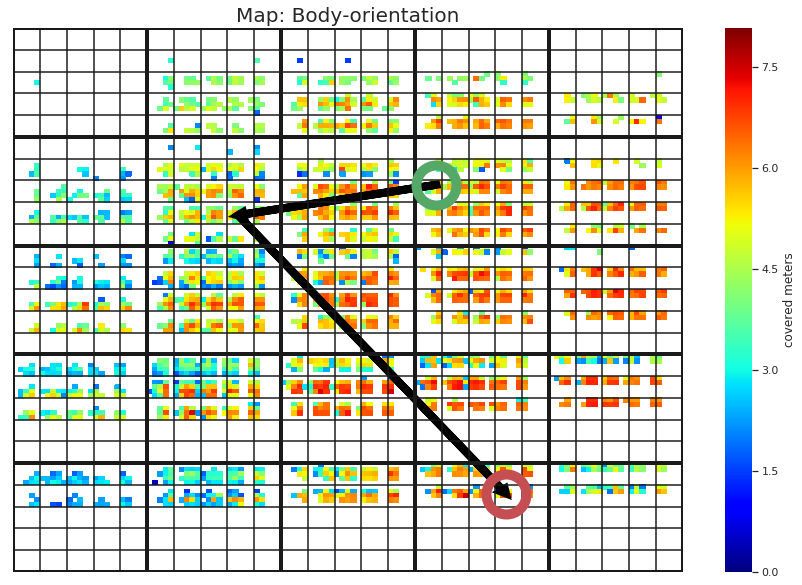

Minscore found: 0
Maxscore found: 7.37327


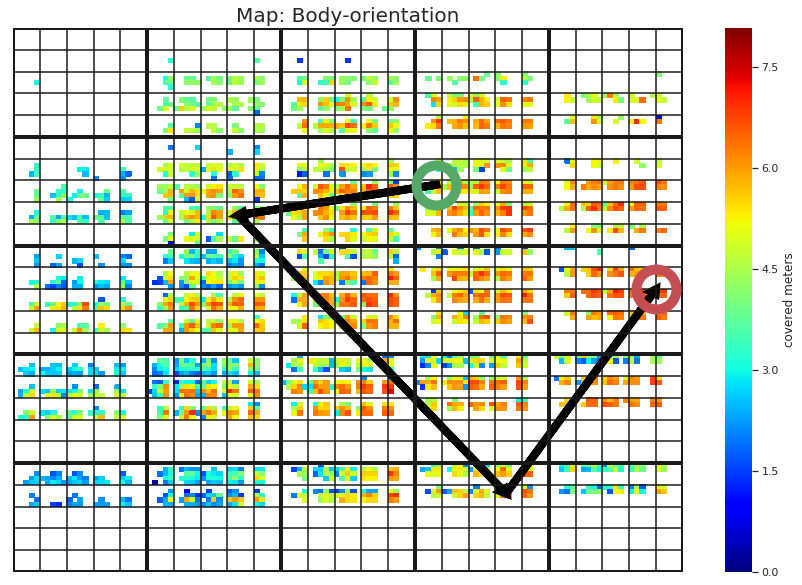

In [5]:
# given directory for iterative archives, present all the heatmaps one after the other
num_dims = 6 # dimensions of descriptor
bin_per_dim = 5 # bins in each descriptor
coordsfilename = "samples.dat"

for i in range(5):
    filename = "bo0208crit/iterations/gp_archive_" + str(i) + ".dat" # text archive you want to present
    present_heatmap(num_dims, bin_per_dim, filename, coordsfilename, gp_archive = True, 
                    fix_range = True, minimum = 0, maximum = 8.07143,
                   num_samples = i)

c1
Minscore found: 0
Maxscore found: 8.52512


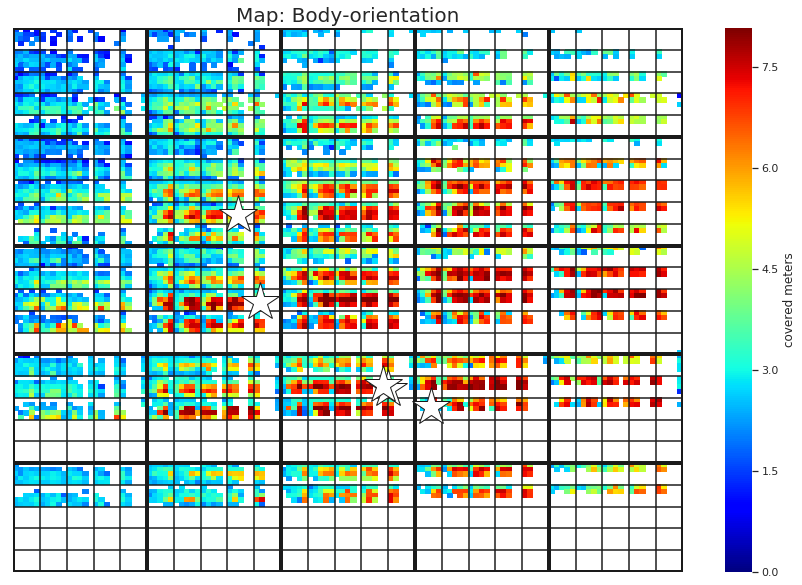

c2
Minscore found: 0
Maxscore found: 8.52512


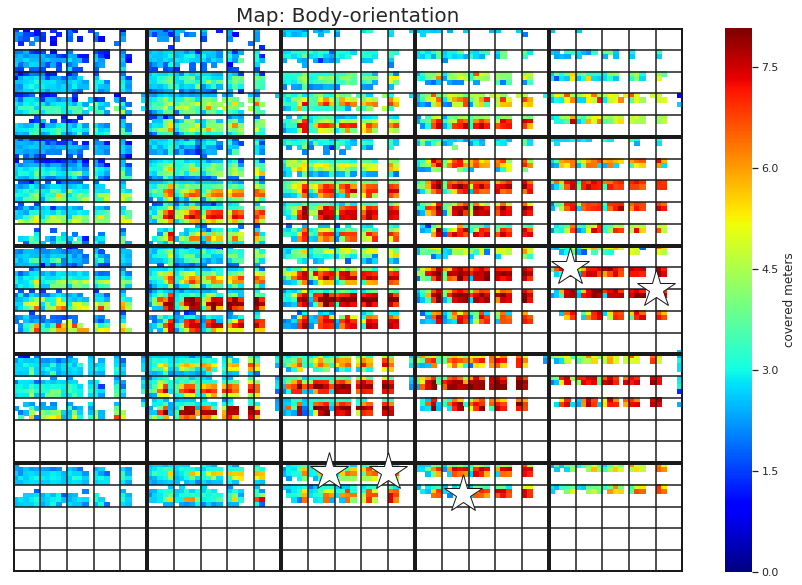

c3
Minscore found: 0
Maxscore found: 8.52512


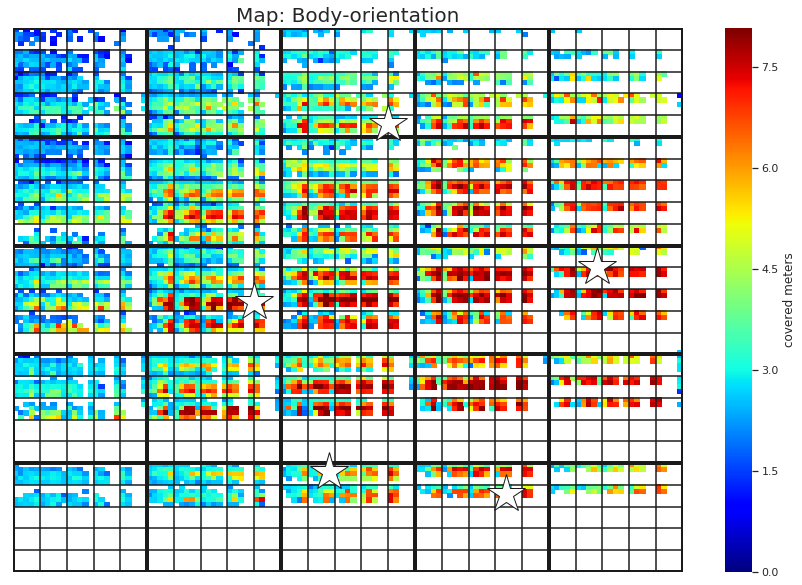

c4
Minscore found: 0
Maxscore found: 8.52512


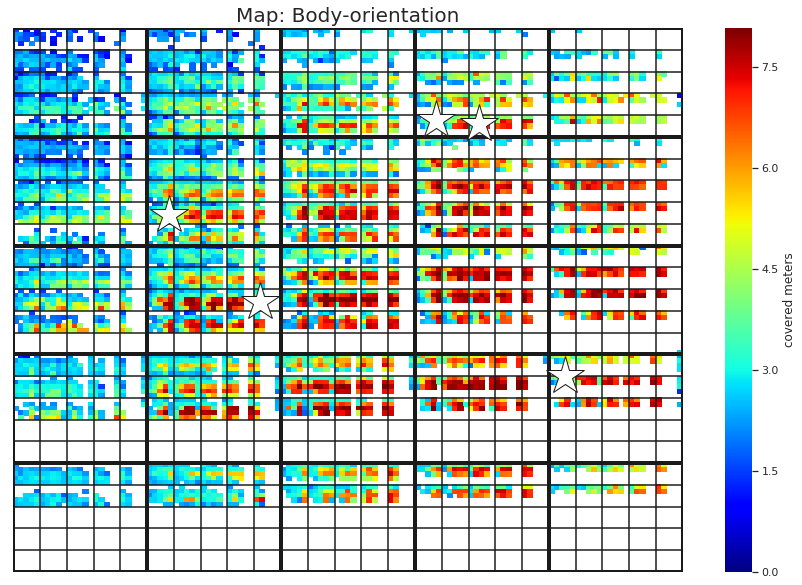

c5
Minscore found: 0
Maxscore found: 8.52512


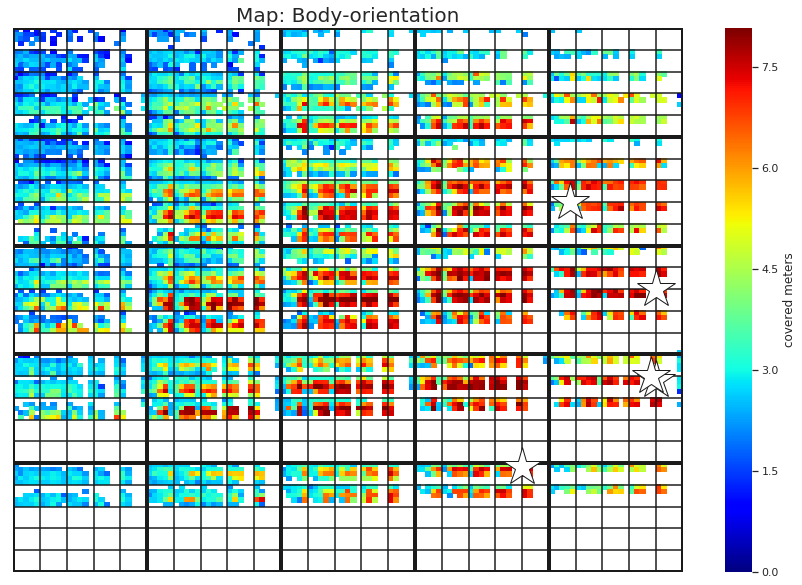

c6
Minscore found: 0
Maxscore found: 8.52512


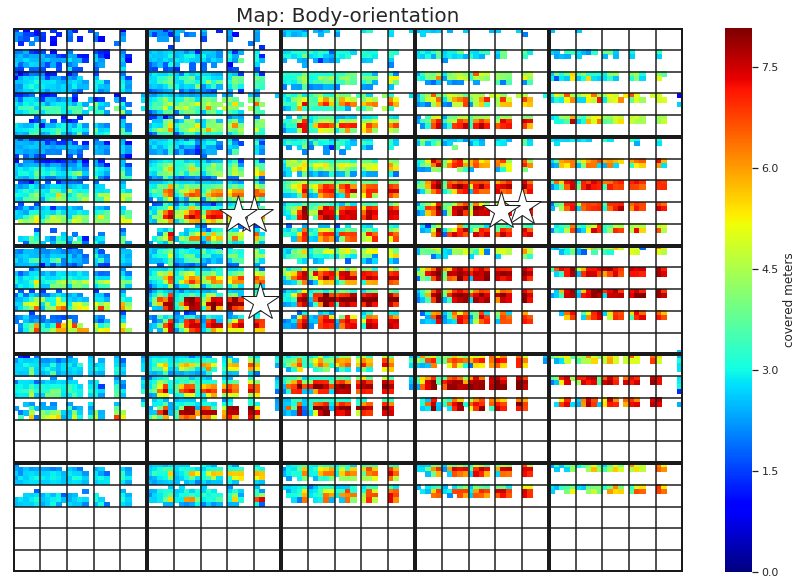

c7
Minscore found: 0
Maxscore found: 8.52512


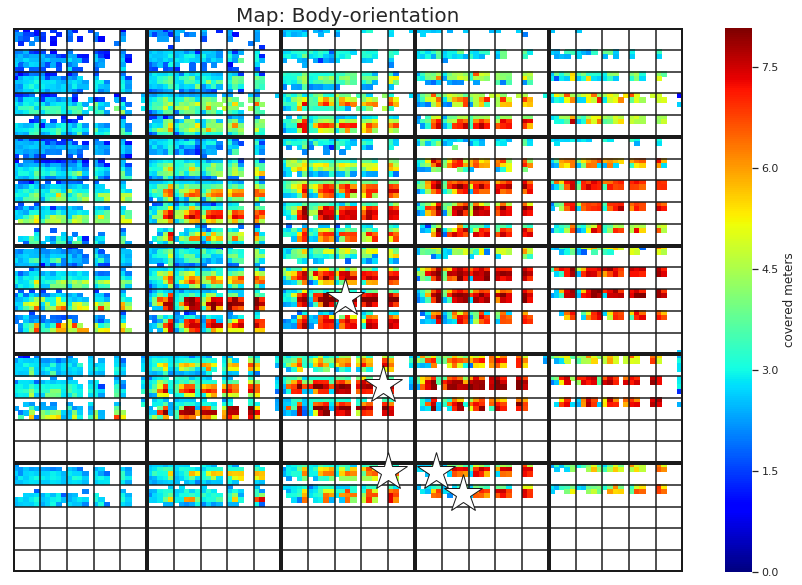

c8
Minscore found: 0
Maxscore found: 8.52512


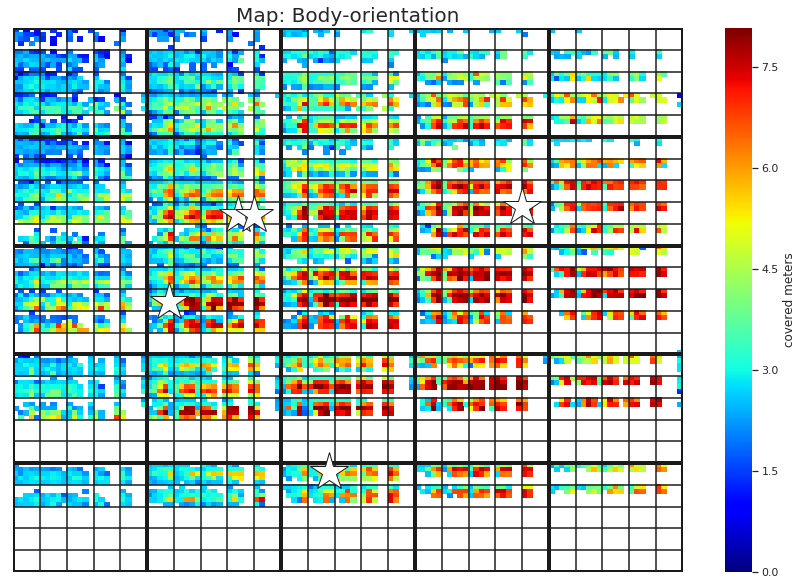

c9
Minscore found: 0
Maxscore found: 8.52512


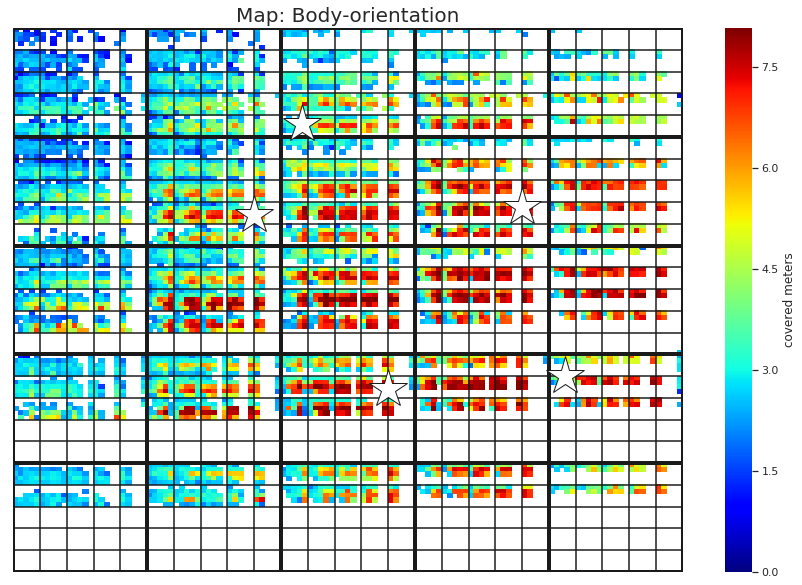

e1
Minscore found: 0
Maxscore found: 8.52512


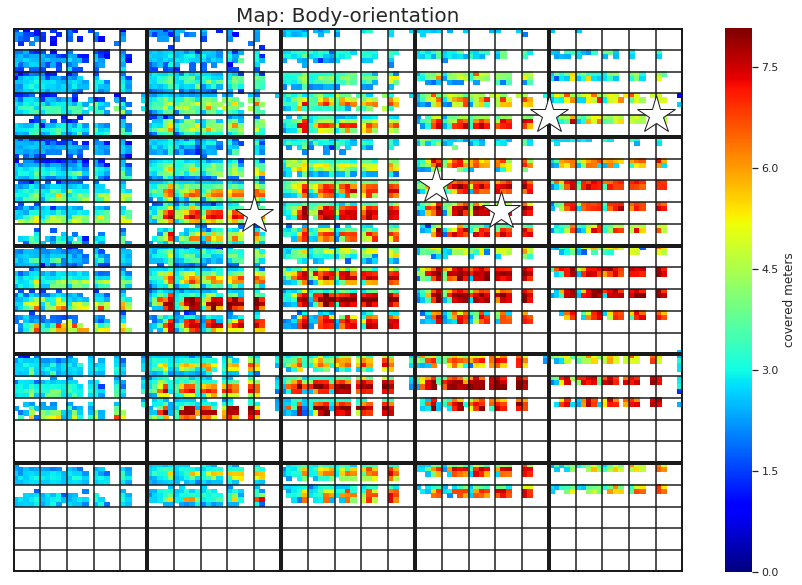

e2
Minscore found: 0
Maxscore found: 8.52512


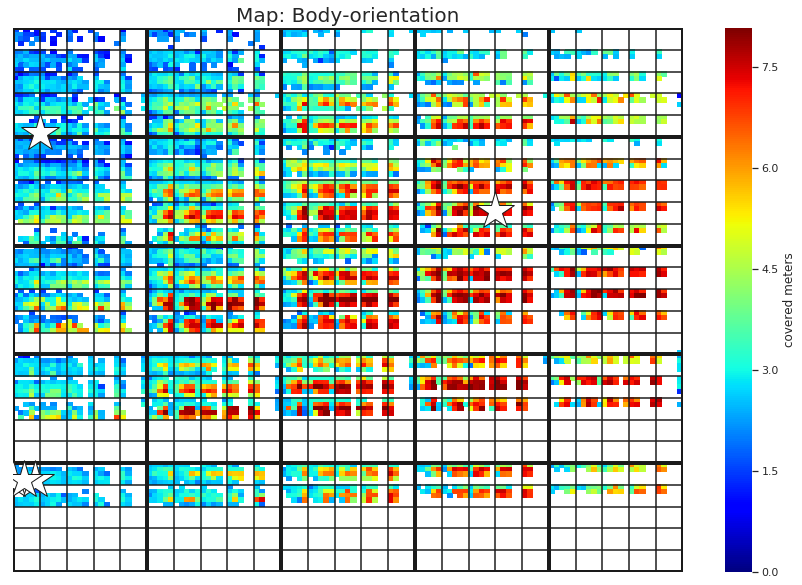

e3
Minscore found: 0
Maxscore found: 8.52512


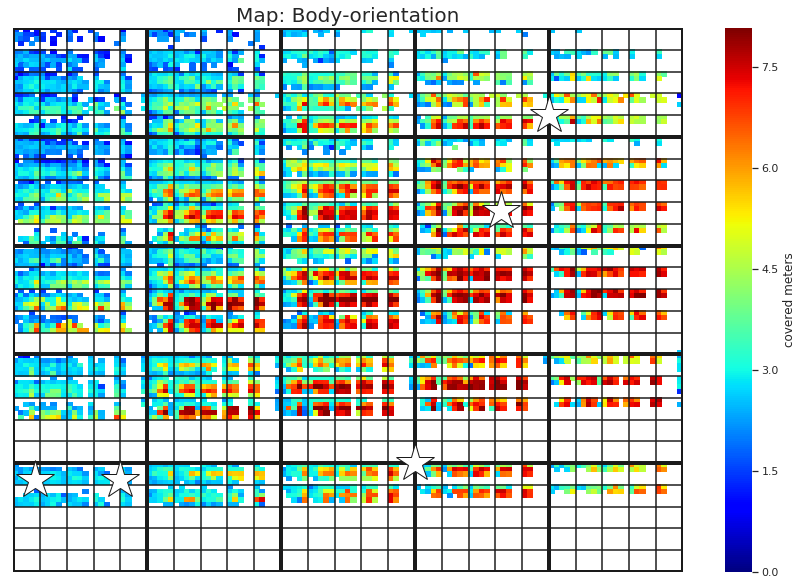

e4
Minscore found: 0
Maxscore found: 8.52512


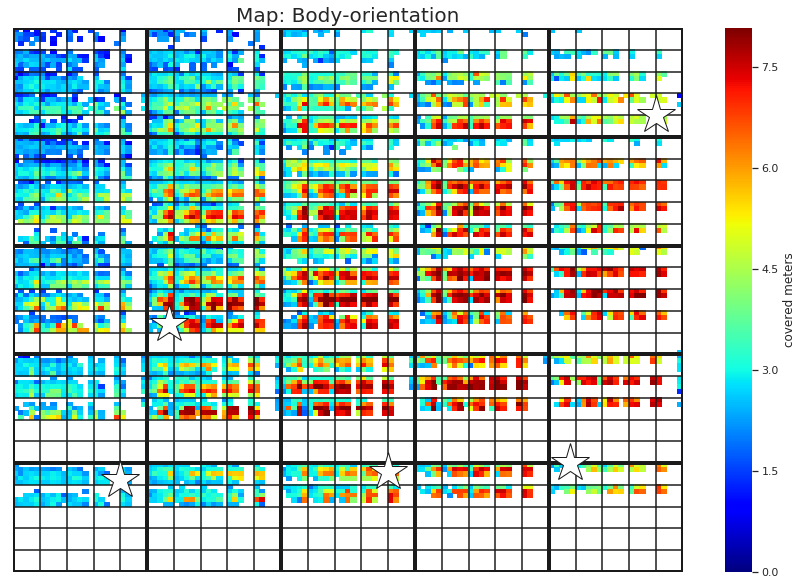

e5
Minscore found: 0
Maxscore found: 8.52512


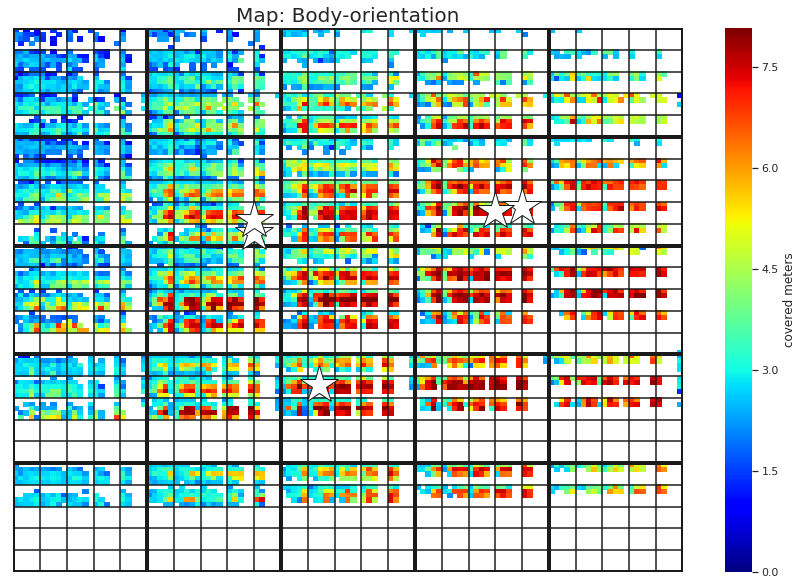

e6
Minscore found: 0
Maxscore found: 8.52512


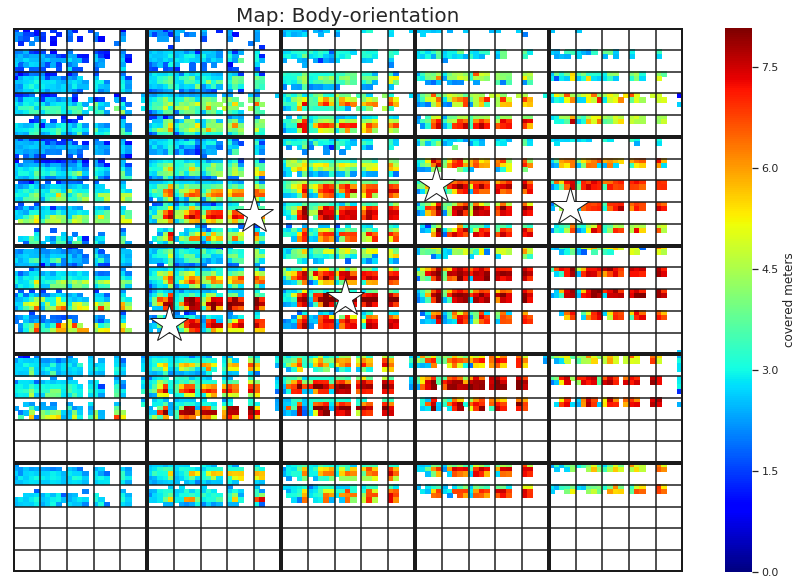

e7
Minscore found: 0
Maxscore found: 8.52512


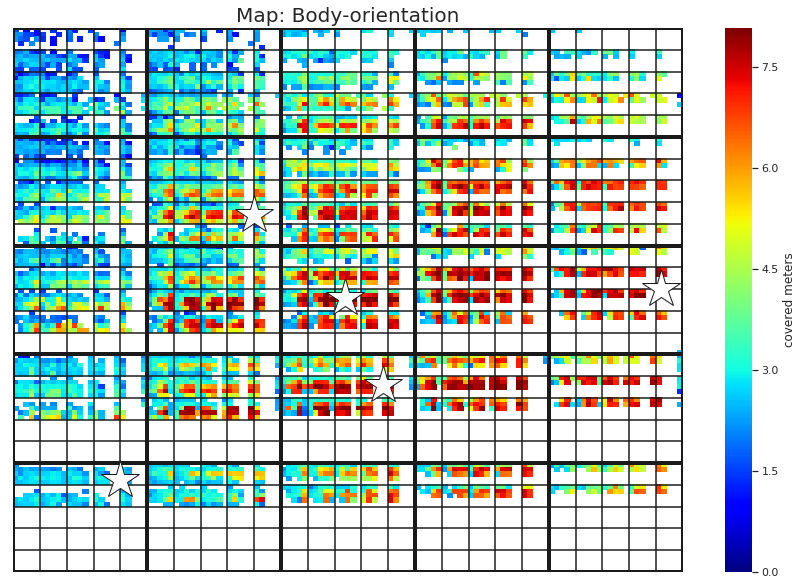

e8
Minscore found: 0
Maxscore found: 8.52512


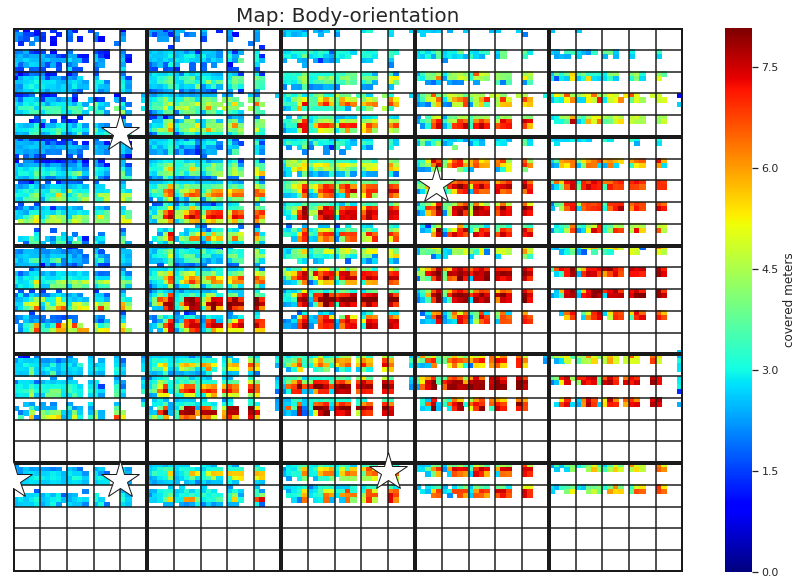

e9
Minscore found: 0
Maxscore found: 8.52512


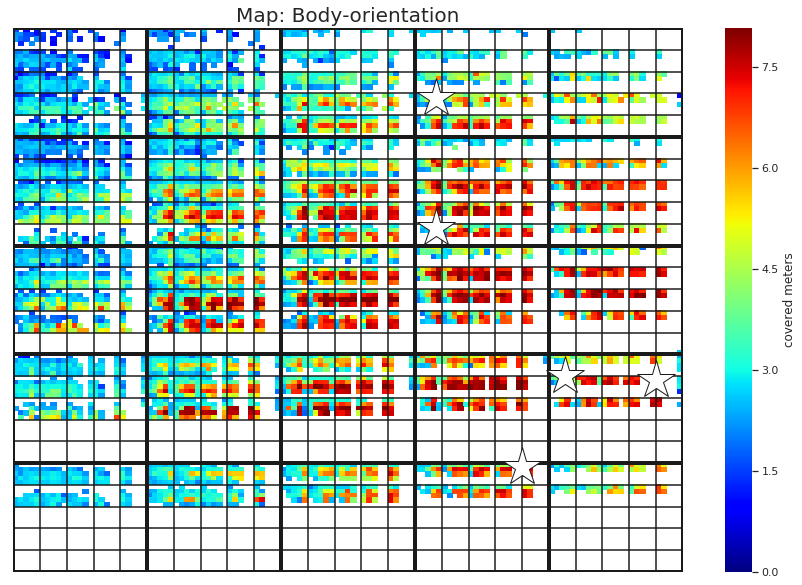

Minscore found: 0
Maxscore found: 8.08347


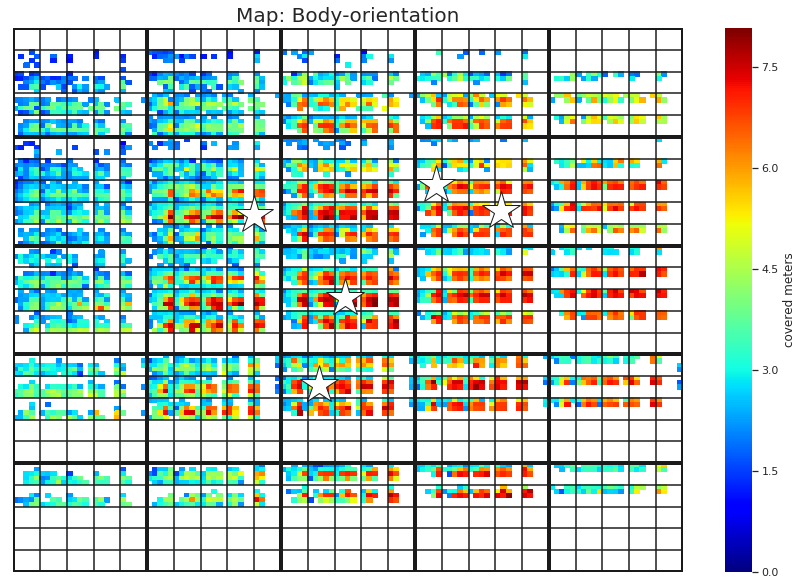

In [17]:
def get_max_archive_geno(filename):
    data = np.loadtxt(filename)
    return data[np.argmax(data[:,7]), 8:]

def get_max_archive_phen(filename):
    data = np.loadtxt(filename)
    return data[np.argmax(data[:,7]),1:7]

def get_ite_point(folder): # folder containing limbo ite experiment folders
    # for each ite folder under something like c1, e1 etc.. expect 5 values if 5 of these folders
    best_samples = []
    for subfolder in os.listdir(folder):
        if subfolder != "max_archive_gaits.txt" and subfolder != "ref.txt":
            data = np.loadtxt(folder +"/" + subfolder + "/best_samples.dat")
            best_sample = data[len(data) - 1][1:]
            best_samples.append(best_sample)
        
    return best_samples

coordsfilename = ""

filenames = ["dcf0608/1/archive_2300.dat", "dcf0608/2/archive_3600.dat", "dcf0608/3/archive_3600.dat", "dcf0608/4/archive_3050.dat", "dcf0608/5/archive_3550.dat"] # text archives you want to present
ite_results_folder = "dcf0608/iteresults"

filenames = ["bo0208/1/archive_3000.dat","bo0208/2/archive_2200.dat","bo0208/3/archive_1900.dat","bo0208/4/archive_2450.dat","bo0208/5/archive_2400.dat"]
ite_results_folder = "bo0208/iteresults"

for ite_folder in sorted(os.listdir(ite_results_folder)):
    print(ite_folder)
    points = get_ite_point(ite_results_folder + "/" + ite_folder)
    present_heatmap(num_dims, bin_per_dim, filenames[0], coordsfilename, 
            fix_range = True, minimum = 0, maximum = 8.07143, num_samples = 2, points = points)


points = []
for file in filenames:
    points.append(get_max_archive_phen(file))

# for each of these, plot it on a map
coordsfilename = ""
present_heatmap(num_dims, bin_per_dim, filenames[1], coordsfilename, 
            fix_range = True, minimum = 0, maximum = 8.07143, num_samples = 2, points = points)


In [6]:
bo_filenames = ["bo0208/1/archive_3000.dat", "bo0208/2/archive_2200.dat", "bo0208/3/archive_1900.dat", "bo0208/5/archive_2400.dat", "bo0208/4/archive_2450.dat"]
max_bo_gens = []
for file in bo_filenames:
    max_bo_gens.append(get_max_archive_geno(file))
max_bo_gens

[array([1.   , 0.65 , 0.925, 0.725, 0.325, 0.625, 0.125, 0.725, 0.425,
        0.175, 0.075, 0.   , 0.65 , 0.425, 0.65 , 0.45 , 1.   , 0.425,
        0.325, 0.525, 0.1  , 0.525, 0.275, 0.625]),
 array([1.   , 0.45 , 0.15 , 0.   , 0.75 , 0.625, 0.35 , 0.975, 0.3  ,
        0.7  , 0.525, 0.925, 0.45 , 0.3  , 0.925, 0.3  , 0.   , 0.95 ,
        0.625, 0.55 , 0.875, 0.775, 0.25 , 0.05 ]),
 array([1.   , 0.375, 0.4  , 0.825, 0.725, 0.675, 0.975, 0.9  , 0.825,
        0.225, 1.   , 0.   , 0.375, 0.9  , 0.125, 0.4  , 0.95 , 0.225,
        0.375, 0.45 , 0.425, 0.775, 0.55 , 0.875]),
 array([1.   , 0.575, 0.475, 0.8  , 0.5  , 0.375, 0.7  , 0.725, 0.325,
        0.05 , 0.425, 0.25 , 0.825, 1.   , 0.025, 0.4  , 0.475, 0.675,
        0.175, 0.85 , 0.975, 0.9  , 0.75 , 0.2  ]),
 array([1.   , 0.15 , 0.65 , 0.2  , 0.1  , 0.375, 0.325, 0.775, 0.2  ,
        0.625, 0.25 , 0.625, 0.9  , 0.575, 0.75 , 0.125, 0.775, 0.1  ,
        0.475, 0.125, 0.2  , 0.1  , 0.475, 0.2  ])]

Minscore found: 0
Maxscore found: 8.52512


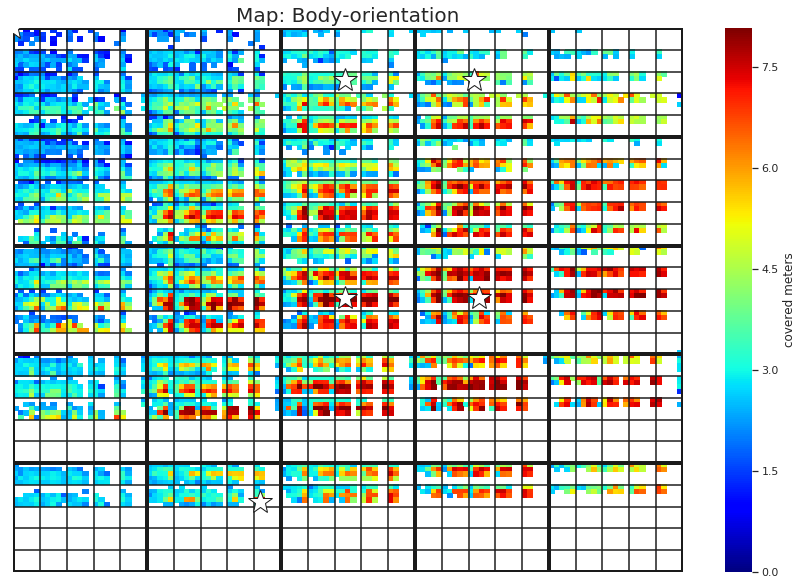

13671

In [22]:
coordfilename = ""
# dcf0608/2/archive_3600.dat
# Analysing gaits

num_dims = 6 # dimensions of descriptor
bin_per_dim = 5 # bins in each descriptor
present_heatmap(num_dims, bin_per_dim, "bo0208/1/archive_3000.dat", coordsfilename, 
            fix_range = True, minimum = 0, maximum = 8.07143, num_samples = 2, 
                points = [[0, 0, 0, 0, 0, 0], [0, 0.4, 0.4, 0.4, 0.4, 0.4], [0, 0.4, 0.4, 0.6, 0.4, 0.2 ], [0.4, 0.4, 0.4, 0.6, 0.4, 0.4], [0.4, 0.4, 0.4, 0.4, 0.4, 0.4],[0.8, 0.2, 0.8, 0.2, 0.8, 0.2]])



np.ravel_multi_index(get_coord([0.8, 0.2, 0.8, 0.2, 0.8, 0.2], (128,128)),(128,128), order='F')

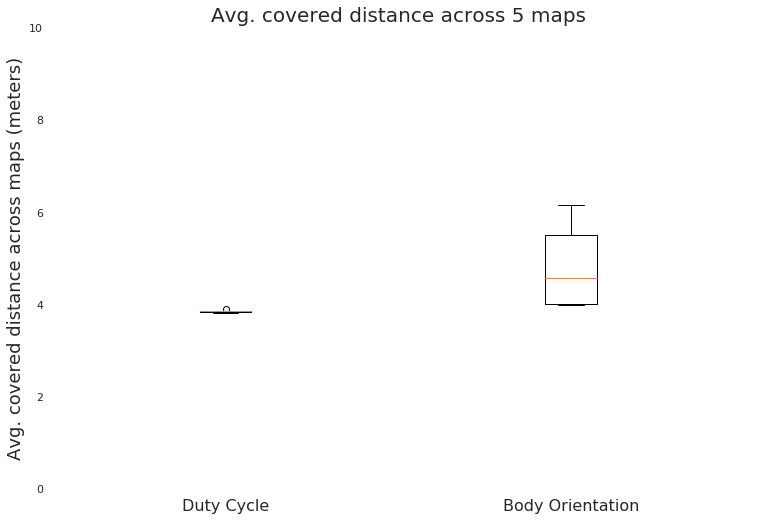

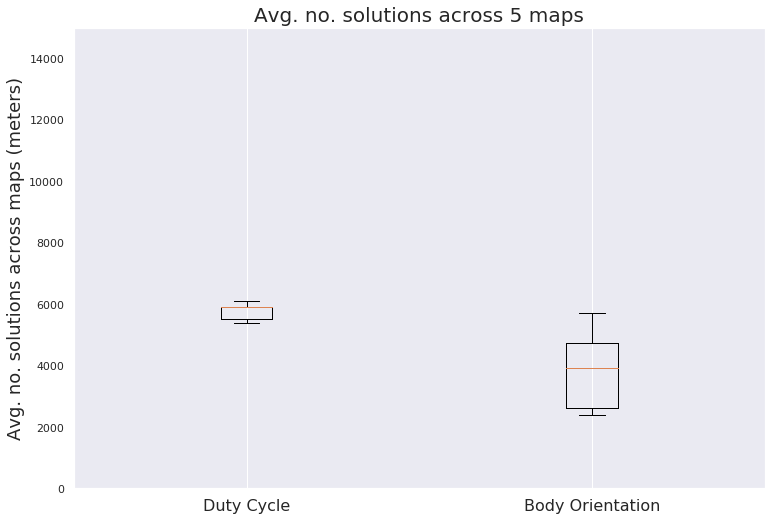

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def present_stats(archive_sets):

    score_sets = []
    num_sols_sets = []
    for archives in archive_sets:
        scores = []
        num_sols = []
        
        for archive in archives:
            data = np.loadtxt(archive)
            scores.append(np.mean(data[:,7]))
            num_sols.append(len(data))
            
        score_sets.append(scores)
        num_sols_sets.append(num_sols)
        
    # boxplot no solutions
    ticks = [1,2]
    boxes_x = ["Duty Cycle", "Body Orientation"]
    
    fig = plt.figure(figsize = [12,8])
    axes = fig.add_axes([0.1,0.1,0.8,0.8])
    axes.set_facecolor('w')
    axes.set_ylim([0,10])
    axes.boxplot(score_sets)    
    plt.xticks(ticks, boxes_x, fontsize = 16)
    plt.title("Avg. covered distance across 5 maps", fontsize = 20)
    plt.ylabel("Avg. covered distance across maps (meters)", fontsize = 18)
    plt.grid(axis='y')
    #plt.savefig()
    plt.show()
    
    # boxplot avg performance
    fig = plt.figure(figsize = [12,8])
    axes = fig.add_axes([0.1,0.1,0.8,0.8])
    axes.set_ylim([0,15000])
    plt.boxplot(num_sols_sets)
    axes.boxplot(num_sols_sets)
    plt.title("Avg. no. solutions across 5 maps", fontsize = 20)
    plt.xticks(ticks, boxes_x, fontsize = 16)
    plt.ylabel("Avg. no. solutions across maps (meters)", fontsize = 18)
    plt.grid(axis='y')
    plt.show()
    
dc_filenames = ["dcf0608/1/archive_2300.dat", "dcf0608/2/archive_3600.dat", "dcf0608/3/archive_3600.dat", "dcf0608/4/archive_3050.dat", "dcf0608/5/archive_3550.dat"]
bo_filenames = ["bo0208/1/archive_3000.dat","bo0208/2/archive_2200.dat","bo0208/3/archive_1900.dat","bo0208/4/archive_2450.dat","bo0208/5/archive_2400.dat"]
file_sets = [dc_filenames, bo_filenames]
present_stats(file_sets)
